# Workshop 3

Starter code for workshop 3. You should have seen most of it before, but make sure you understand what it is doing!

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
import pandas as pd

housing = pd.read_csv("workshop3.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


Split the available data 80/20 for training and testing. Don't use the test data until the very end!

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

median_house_value is the value we want to predict, so separate it from the other features.

In [7]:
X_train = train_set.drop(["median_house_value"], axis=1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop(["median_house_value"], axis=1)
y_test = test_set["median_house_value"].copy()

Your code starts here...

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

lr_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()), ('lr',LinearRegression()) ])
lr_pl.fit(X_train,y_train)
y_pred = lr_pl.predict(X_train)

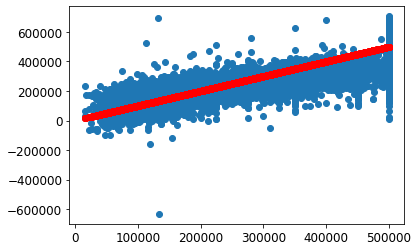

In [9]:
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'r-o')

In [10]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_lr)

69411.6554100667


In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn_pl = Pipeline([ ??? ])
knn_pl.???(X_train,y_train)
y_pred = knn_pl.???(X_train)
rmse_knn = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_knn)

SyntaxError: invalid syntax (<ipython-input-11-3c1a5c2f302e>, line 3)

In [12]:
for k in range(3,20):
    for w in ['uniform','distance']:
        knn_pl = Pipeline(???)
        knn_pl.???(X_train,y_train)
        y_pred = knn_pl.???(X_train)
        rmse_knn = np.sqrt(mean_squared_error(y_pred,y_train))
        print(f'RMSE for KNN with k={k} and w={w} is {rmse_knn}')

SyntaxError: invalid syntax (<ipython-input-12-3f90f45843aa>, line 3)

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [24]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [25]:
knn_pl = Pipeline(???)

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [27]:
cv_res = cross_val_score(knn_pl, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(cv_res)

[-59662.52198744 -64107.28367433 -59657.94262349 -62793.98210181
 -62193.41178648]


In [28]:
cv_results = cross_validate(knn_pl, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))

[59662.52198744 64107.28367433 59657.94262349 62793.98210181
 62193.41178648]
61683.02843470842


In [29]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    knn_pl.???(X_trainr,y_trainr)
    y_pred = knn_pl.???(X_val)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for KNN is {rmse_knn}')
    y_pred = knn_pl.???(X_trainr)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for KNN is {rmse_knn}')

VAL RMSE for KNN is 59662.52198744072
TRAIN RMSE for KNN is 56188.72108134248
VAL RMSE for KNN is 64107.28367432653
TRAIN RMSE for KNN is 55252.40265086739
VAL RMSE for KNN is 59657.942623488576
TRAIN RMSE for KNN is 56264.37803425075
VAL RMSE for KNN is 62793.98210180659
TRAIN RMSE for KNN is 55634.29710235575
VAL RMSE for KNN is 62193.411786479715
TRAIN RMSE for KNN is 55866.40889813549


In [30]:
cv_results = cross_validate(knn_pl, X_train, y_train, cv=5, ????=True, scoring='neg_root_mean_squared_error')
print(-cv_results['train_score'])
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))

[56188.72108134 55252.40265087 56264.37803425 55634.29710236
 55866.40889814]
[59662.52198744 64107.28367433 59657.94262349 62793.98210181
 62193.41178648]
61683.02843470842


In [31]:
parameters = {'knn__n_neighbors':[3,5,10,20,30,50], 'knn__weights':['uniform','distance']}
gridcv = GridSearchCV(knn_pl, parameters, cv=5, ???='neg_root_mean_squared_error')
gridcv.fit(X_train, y_train)
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}')  

Best score is 61025.02443587534 for best params of {'knn__n_neighbors': 10, 'knn__weights': 'distance'}


In [ ]:
gridcv.best_estimator_.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_test_pred = gridcv.best_estimator_.predict(X_test)
print(f'Test RMSE is {np.sqrt(mean_squared_error(y_test_pred,y_test))}')